# Vulnerability Classification with Neural Networks in Keras

Neural Networks (NNs) are potent models, able to achieve state-of-the-art performance in many machine learning problems.

Yet, NNs also have many elements that must be appropriately tuned to achieve the best performance.

In this lab, we will dive deeper into NNS and see that we can boost our performance with a high-level understanding of how these moving pieces work together.


![image.png](https://res.cloudinary.com/dh3hm8pb7/image/upload/c_scale,q_auto:best/v1535842782/Handwaving/Published/NeuralNetworkTuning.png)
(source: https://handwaving.net/387)

In [1]:
import pandas as pd
from numpy.random import seed
from tensorflow.random import set_seed
import numpy as np
from sklearn.preprocessing import normalize
from sklearn import model_selection
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [39]:
# Read it and print the first five rows
cvss_data = pd.read_csv('2020cvss.csv')
cvss_data = cvss_data.drop(columns=["Unnamed: 0"])
cvss_data.head()

,attackVector,attackComplexity,privilegesRequired,userInteraction,confidentialityImpact,integrityImpact,availabilityImpact,label
0,0.55,0.44,0.62,0.85,0.66,0.66,0.66,2
1,0.85,0.44,0.85,0.62,0.66,0.66,0.66,2
2,0.55,0.77,0.62,0.62,0.66,0.66,0.66,1
3,0.55,0.44,0.62,0.85,0.00,0.00,0.66,1
4,0.55,0.44,0.27,0.85,0.66,0.66,0.66,1


Recall that we have seven features:
- Attack Vector
- Attack Complexity
- Privileges Required
- User Interaction
- Confidentiality Impact
- Integrity Impact
- Availability Impact

and four severity classes:
- LOW
- MIDDLE
- HIGH
- CRITICAL

The features are already converted to numerical representations and normalized.

Now it's your turn. Use this dataset to train the best NN classifier you can. The steps for this are outlined in the cells below. Please, fill in the missing code.

Important! Before you get started, create a copy of this notebook to your google drive and work on your own copy.

Once you are done, submit your solutions here: [https://forms.gle/ERv66SLxQqnHww3R9](https://forms.gle/ERv66SLxQqnHww3R9)


## 1 - Start by preprocessing your data. Split your data into training, validation, and test sets. Remember to also one-hot encode the labels.

In [66]:
#X_train, X_test, y_train, y_test = model_selection.train_test_split(cvss_data[cvss_data.columns[0:7]].values, cvss_data['label'].values, test_size=0.2)
X_train, X_test, y_train, y_test = model_selection.train_test_split(cvss_data[["attackVector", "attackComplexity", "privilegesRequired", "userInteraction", "confidentialityImpact", "integrityImpact", "availabilityImpact"]].values
, cvss_data['label'].values, test_size=0.2)

# one hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# spliting train into train and validation
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((9161, 7), (9161, 4), (2291, 7), (2291, 4), (2863, 7), (2863, 4))

In [60]:
def train_model(model, X_train, y_train, X_val, y_val, epochs, batch_size, verbose=0, learning_rate=0.1):
  opt = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
  return model.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=batch_size, validation_data=(X_val, y_val))

In [67]:
train_model(model,X_train,y_train, X_val, y_val, 1, 1, verbose=1)

9161/9161 [==============================] - 34s 4ms/step - loss: 0.2426 - accuracy: 0.9063 - val_loss: 0.1949 - val_accuracy: 0.9393


In [62]:
y_test

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

## 2 - Create a simple 2-layer NN baseline for this dataset. Use 4 neurons in the hidden layer and train the network for a single epoch.

In [42]:
num_features = 7
num_classes = 4
name = "CVSS-2-layer-NN"

def create_model(name, num_features, num_classes, num_neurons=4):
  model = Sequential(name=name)
  model.add(Dense(num_neurons, input_dim=num_features, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))
  return model

model = create_model(name, num_features, num_classes)

In [43]:
opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
model.fit(X_train, y_train, epochs=1, verbose=1, batch_size=1, validation_data=(X_val, y_val))

9161/9161 [==============================] - 38s 4ms/step - loss: 0.4624 - accuracy: 0.7962 - val_loss: 0.1863 - val_accuracy: 0.9520


## 3 - Now tune your network. Start by tuning the batch size. 

In [44]:
histories = []
batch_sizes = [8, 32, 128, 256]
for batch_size in batch_sizes:
  print("Batch_size: ", batch_size)
  model = Sequential(name="ourNN")
  model.add(Dense(4, input_dim=num_features, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  opt = keras.optimizers.SGD(learning_rate=0.1)
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
  history = model.fit(X_train, y_train, epochs=1, verbose=1, batch_size=batch_size, validation_data=(X_val, y_val))
  histories.append(history) # the history object saves some information about the training, we will use this information later
  print('\n')

Batch_size:  8
1146/1146 [==============================] - 6s 5ms/step - loss: 0.6671 - accuracy: 0.7414 - val_loss: 0.4273 - val_accuracy: 0.9079


Batch_size:  32
287/287 [==============================] - 2s 5ms/step - loss: 0.8958 - accuracy: 0.6244 - val_loss: 0.7925 - val_accuracy: 0.6691


Batch_size:  128
72/72 [==============================] - 2s 10ms/step - loss: 1.2047 - accuracy: 0.5543 - val_loss: 1.0619 - val_accuracy: 0.6430


Batch_size:  256
36/36 [==============================] - 1s 16ms/step - loss: 1.2635 - accuracy: 0.4709 - val_loss: 1.0878 - val_accuracy: 0.6517




## 4 - Next, tune the number of epochs for training the network. Use the learning curve to choose a reasonable number of epochs for future trainings.

In [45]:
model = Sequential(name="ourNN")
model.add(Dense(4, input_dim=num_features, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
history = model.fit(X_train, y_train, epochs=20, verbose=0, batch_size=128, validation_data=(X_val, y_val)) # we'll set verbosity to 0 and use just the learning curve from now on

training_accuracies = [0] + history.history["accuracy"]
validation_accuracies = [0] + history.history["val_accuracy"]

## 5 - Tune the size of your network, by choosing the number of layers and the neurons per layer.

Hint: you can re-use the heuristic used in the class to define the size.

Neurons: 4
Final val accuracy: 0.9135748744010925 

Neurons: 16
Final val accuracy: 0.9087734818458557 

Neurons: 32
Final val accuracy: 0.9148843288421631 

Neurons: 64
Final val accuracy: 0.8917503356933594 

Neurons: 128
Final val accuracy: 0.9214316606521606 

Neurons: 256
Final val accuracy: 0.9223046898841858 

Neurons: 512
Final val accuracy: 0.9292885065078735 



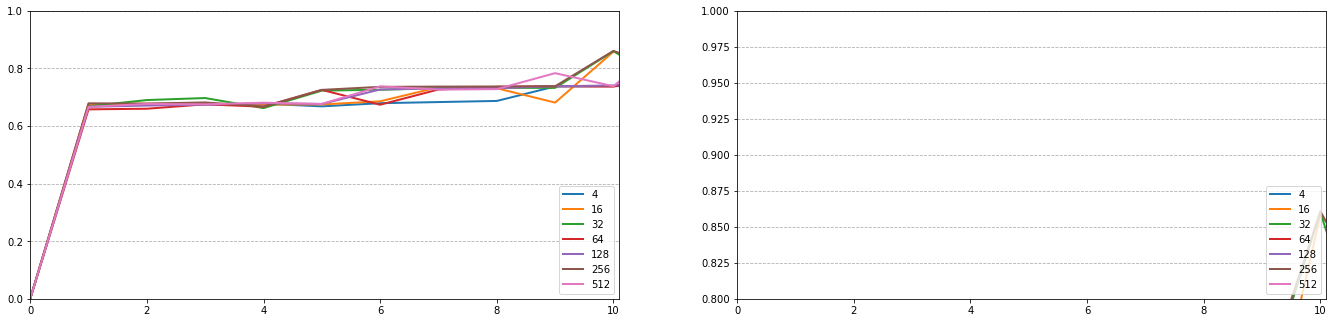

In [46]:
neurons = [4, 16, 32, 64, 128, 256, 512] # We will include 4 as well, since it was our baseline
histories = []
for number_of_neurons in neurons:
  model = Sequential(name="ourNN")
  model.add(Dense(number_of_neurons, input_dim=num_features, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid')) # the output layer is always the same

  opt = keras.optimizers.SGD(learning_rate=0.1)
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
  history = model.fit(X_train, y_train, epochs=20, verbose=0, batch_size=128, validation_data=(X_val, y_val))
  histories.append(history)
  print("Neurons:", number_of_neurons)
  print("Final val accuracy:", history.history["val_accuracy"][-1], "\n")

fig, ax = plt.subplots(1,2)
for idx, history in enumerate(histories):
  accuracies = [0] + history.history['val_accuracy'] # at epoch 0, accuracy is 0 since the network wasn't trained yet
  ax[0].plot(range(len(accuracies)), accuracies, linestyle='-', label=neurons[idx], linewidth=2)
  ax[1].plot(range(len(accuracies)), accuracies, linestyle='-', label=neurons[idx], linewidth=2)
ax[0].set_xlim(0,10.1)
ax[0].set_ylim(0,1)
ax[0].grid(axis='y', linestyle='--')
ax[0].legend(loc="lower right")

ax[1].set_xlim(0,10.1)
ax[1].set_ylim(0.8,1)
ax[1].grid(axis='y', linestyle='--')
ax[1].legend(loc="lower right")
plt.subplots_adjust(left=0, bottom=0, right=3, top=1)
plt.show()

## 6 - Last, tune the learning rate of your network.

Learning rate 10 final val accuracy: 0.4251418709754944
Learning rate 1 final val accuracy: 0.49890878796577454
Learning rate 0.1 final val accuracy: 0.9305980205535889
Learning rate 0.01 final val accuracy: 0.6695765852928162


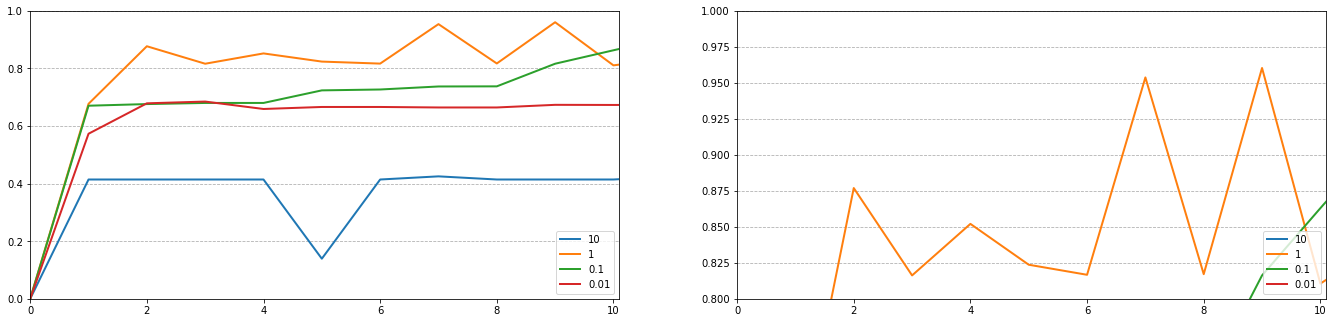

In [47]:
histories = []
learning_rates = [10, 1, 0.1, 0.01]
for learning_rate in learning_rates:
  model = Sequential(name="ourNN")
  model.add(Dense(512, input_dim=num_features, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  opt = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
  history = model.fit(X_train, y_train, epochs=20, verbose=0, batch_size=128, validation_data=(X_val, y_val))
  print(f"Learning rate {learning_rate} final val accuracy: {history.history['val_accuracy'][-1]}")
  histories.append(history)

fig, ax = plt.subplots(1,2)
for idx, history in enumerate(histories):
  accuracies = [0] + history.history['val_accuracy'] # at epoch 0, accuracy is 0 since the network wasn't trained yet
  ax[0].plot(range(len(accuracies)), accuracies, linestyle='-', label=learning_rates[idx], linewidth=2)
  ax[1].plot(range(len(accuracies)), accuracies, linestyle='-', label=learning_rates[idx], linewidth=2)
ax[0].set_xlim(0,10.1)
ax[0].set_ylim(0,1)
ax[0].grid(axis='y', linestyle='--')
ax[0].legend(loc="lower right")

ax[1].set_xlim(0,10.1)
ax[1].set_ylim(0.8,1)
ax[1].grid(axis='y', linestyle='--')
ax[1].legend(loc="lower right")
plt.subplots_adjust(left=0, bottom=0, right=3, top=1)
plt.show()

## 7 - Now it is time for you to test the ultimate performance of your network against the test set using the just tunned hyperparameters. Compute accuracy, precision, and recall as evaluation metrics.

In [68]:
model = Sequential(name="CVSS-NN")
model.add(Dense(512, input_dim=num_features, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=1)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
history = model.fit(X_train, y_train, epochs=10, verbose=0, batch_size=128, validation_data=(X_val, y_val))
y_predicted =  np.argmax(model.predict(X_test), axis=1)


y_test = np.where(y_test==1)[1] # we convert the labels back to integers instead of one-hot encoding to use the confusion_matrix method
print(confusion_matrix(y_test, y_predicted))
print()
print('Accuracy:', '{:0.2f}'.format(accuracy_score(y_test, y_predicted)))
print('Precision:', '{:0.2f}'.format(precision_score(y_test, y_predicted, average="macro")))
print('Recall:', '{:0.2f}'.format(recall_score(y_test, y_predicted, average="macro")))

[[  41   21    0    0]
 [   0 1116   77    0]
 [   0    5 1210    5]
 [   0    0   20  368]]

Accuracy: 0.96
Precision: 0.97
Recall: 0.88
